In [2]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from src.utils import plot_path
import wandb
from tqdm import tqdm
from src.shortest_path import ShortestPath

In [4]:
# center_point = (29.72346214336903, -95.38599726549226) # houston museum/houston center points
# G = ox.graph.graph_from_point(center_point, dist=20000, simplify = True, network_type='drive') # almost all houston roads

In [10]:
# ox.save_graphml(G, './datasets/osmnx/houston_drive_20000.graphml')

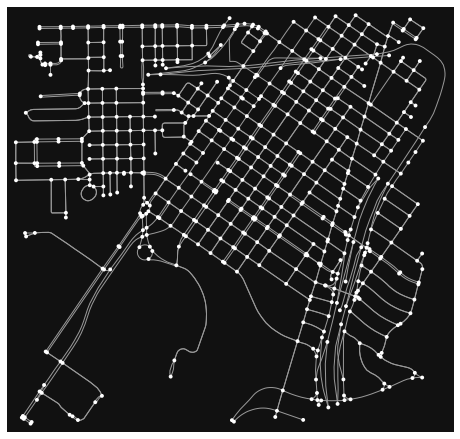

origin_node id: 152621212 origin_node_error:  31.293806511730672
destination_node id: 151580985 destination_node_error:  79.25495814742801


In [2]:
# G = ox.load_graphml("./datasets/osmnx/houston_tx_usa_drive.graphml")
center_point = (29.72346214336903, -95.38599726549226) # houston museum/houston center points
try:
    G = ox.load_graphml("./houston_tx_usa_drive_5000.graphml")
    print("Graph Loaded")
except:
    G = ox.graph.graph_from_point(center_point, dist=1300, simplify = True, network_type='drive')
    ox.save_graphml(G, "./datasets/osmnx/houston_tx_usa_drive.graphml")
    ox.plot_graph(G)

# define origin and desination locations 
origin_point = center_point
destination_point = (29.714630473243457, -95.37716122309068) # lat long
# get the nearest nodes to the locations 
origin_node, origin_node_error = ox.distance.nearest_nodes(G, X = origin_point[1], Y = origin_point[0], return_dist = True)
destination_node, destination_node_error = ox.distance.nearest_nodes(G, X = destination_point[1], Y = destination_point[0], return_dist = True)
# printing the closest node id to origin and destination points 
print("origin_node id:", origin_node, "origin_node_error: ", origin_node_error)
print("destination_node id:", destination_node, "destination_node_error: ", destination_node_error)

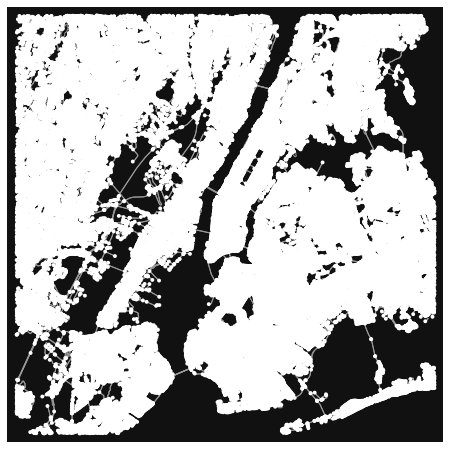

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
# newyork
center_point = (40.733442069598276, -73.99526536266013)
G = ox.graph.graph_from_point(center_point, dist=20000, simplify = True, network_type='drive')
ox.save_graphml(G, "./datasets/osmnx/nyc_usa_drive_20000.graphml")
ox.plot_graph(G)

In [3]:
SP = ShortestPath(G)
# ox.plot_graph(G)

nodesNumber: 617


In [6]:
def plot_path(lat, long, origin_point, destination_point):

    flooded_point = (29.719234316403067, -95.37637299903416)
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "markers+lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
        
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))

    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))

    # adding flood marker
    fig.add_trace(go.Scattermapbox(
        name = "Flood Points",
        mode = "markers",
        lon = [flooded_point[1]],
        lat = [flooded_point[0]],
        marker = {'size': 12, 'color':"blue"}))
     
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 'lon': long_center},
                          'zoom': 13})
    fig.show()

In [ ]:
scores, steps = SP.shortest_path(origin_node, destination_node)

In [ ]:
Q_route = [SP.reverse_nodes_dict[r] for r in steps]
lat, long = SP.get_route_lat_long(Q_route)
# print("length of route:", SP.get_route_length(Q_route))
plot_path(lat, long, origin_point, destination_point)

In [ ]:
nx_route = SP.networkx_shortest_path(origin_node, destination_node, plot=False)
lat, long = SP.get_route_lat_long(nx_route)
# print("length of route:", SP.get_route_length(nx_route))
plot_path(lat, long, origin_point, destination_point)

In [7]:
Q_route[0]

152621212

In [10]:
for x in G.edges():
    print(x)
    break

(151366417, 151366418)
